# **Emmanuel NYANDU KAGARABI**

# **Applied Machine Learning at scale : Practical 2 - 3 : with user and item vectors**

# **0. Libraries**

In [1]:
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

# **1. Data structure**

In [2]:
# Ratings data
df = pd.read_csv('/home/emmanuelnk/Desktop/ML_AT_SCALE/ml-25m-20240511T131321Z-001/ml-25m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [3]:
df_ratings = df[['userId', 'movieId', 'rating']].to_numpy()

In [4]:
# Movies data
df_movies = pd.read_csv('/home/emmanuelnk/Desktop/ML_AT_SCALE/ml-25m-20240511T131321Z-001/ml-25m/movies.csv')
# Movies head
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
def initialize_data_structure(dataset):

    #1. Data strucures

    # Dictionnaries to map user/movie to its index
    user_to_index = {} # ex {"u1":0,...,"u100": 99}
    movie_to_index = {} # ex {"m1":0,...,"m50": 49}

    # Lists to store  user/movie  indces
    list_to_user = [] # ex ["u1",...,"u100"]
    list_to_movie = [] # ex ["m1",...,"m50"]

    # Lists to store  user/movie  data
    data_by_user = [] # ex[[(u1,r10),...,(u100,r1100)],[...],[]]
    data_by_movie = [] # ex[[(m1,r10),...,(m100,r1100)],[...],[]]

    #2. Let's fill the data structure given above
    for user, movie, rating in dataset:

        # Users
        if user not in user_to_index:
            index = len(list_to_user)
            user_to_index[user] = index
            list_to_user.append(user)
            data_by_user.append([])
        index = user_to_index[user]

        # Movies
        if movie not in movie_to_index:
            index_movie = len(list_to_movie)
            movie_to_index[movie] = index_movie
            list_to_movie.append(movie)
            data_by_movie.append([])
        index_movie = movie_to_index[movie]

        # Data by user/movie
        data_by_user[index].append((index_movie, rating))
        data_by_movie[index_movie].append((index, rating))

    return data_by_user, data_by_movie, user_to_index, movie_to_index,list_to_user,list_to_movie

In [6]:
data_by_user, data_by_movie, user_to_index, movie_to_index,list_to_user,list_to_movie = initialize_data_structure(df_ratings)


In [7]:
def data_spliting(dataset) :
    # Get the number of rows in the dataset
    number_rows = len(dataset)
    # Shuffle all rows in a given dataset randomly
    np.random.shuffle(rating_data)

    # Define the decision boundary for splitting (80% training, 20% test)
    decision_boundary = 0.8 * number_rows

    # Initialize dictionaries to map user/movies to IDs and vice versa
    user_m_to_id = {}
    user_id_to_m = []
    movie_n_to_id = {}
    movie_id_to_n = []

    # Iterate through each row in the dataset
    for row in range(number_rows) :
        # Get user and movie IDs from the dataset
        user_m = dataset[row][0]
        movie_n = dataset[row][1]

        # Map user to ID if not already mapped
        if user_m not in user_m_to_id :
            user_id_to_m.append(user_m)
            user_m_to_id[user_m] = len(user_m_to_id)

        # Map movie to ID if not already mapped
        if movie_n not in movie_n_to_id :
            movie_id_to_n.append(movie_n)
            movie_n_to_id[movie_n] = len(movie_n_to_id)

    # Initialize training and test data structures for users and movies
    data_by_user_train = [[] for z in range(len(user_id_to_m))]
    data_by_movie_train = [[] for z in range(len(movie_id_to_n))]
    data_by_user_test = [[] for z in range(len(user_id_to_m))]
    data_by_movie_test = [[] for z in range(len(movie_id_to_n))]

    # Iterate through each row in the dataset again
    for row in range(number_rows) :
        # Extract user, movie, and rating information
        user_m = dataset[rows][0]
        movie_n = dataset[row][1]
        rating = dataset[row][2]

        # Get user and movie indices
        user_index = user_m_to_id[user_m]
        movie_index = movie_n_to_id[movie_n]

        # Check if the index is below the decision boundary
        if row < decision_boundary :
            # Insert the point in the training dataset
            data_by_user_train[user_index].append((movie_index, rating))
            data_by_movie_train[movie_index].append((user_index, rating))
        else:
            # Insert the point in the test dataset
            data_by_user_test[user_index].append((movie_index, rating))
            data_by_movie_test[movie_index].append((user_index,rating))

    # Return all data structures
    return user_m_to_id, user_id_to_m, movie_n_to_id, movie_id_to_n, data_by_user_train, data_by_movie_train, data_by_user_test, data_by_movie_test


In [8]:
def create_train_vs_test(data_by_user, data_by_movie,split_percentage):

    # Initialize lists to store training and test data for users and movies
    user_train_data = []
    user_test_data = []

    movie_train_data = []
    movie_test_data = []

    # Iterate through each user's data
    for user_list in data_by_user:

        # Shuffle the user data
        random.shuffle(user_list)

        # Determine the split point based on the split percentage
        decision_boundary_u = int(len(user_list) * split_percentage)

        # Split the data into training and test sets
        train_data_u = user_list[:decision_boundary_u]
        test_data_u = user_list[decision_boundary_u:]

        # Append the training and test data to the respective data
        user_train_data.append(train_data_u)
        user_test_data.append(test_data_u)

    # Iterate through each movie's data
    for movie_list in data_by_movie:

        # Shuffle the movie data
        random.shuffle(movie_list)

        # Determine the split point based on the split percentage
        decision_boundary_m = int(len(movie_list) * split_percentage)

        # Split the data into training and test sets
        train_data_m = movie_list[:decision_boundary_m]
        test_data_m = movie_list[decision_boundary_m:]

        # Append the training and test data
        movie_train_data.append(train_data_m)
        movie_test_data.append(test_data_m)

    # Return the training and test matrices for users and movies
    return user_train_data, user_test_data, movie_train_data, movie_test_data


In [9]:
split_percentage = 0.9
# Initialize data structures
data_by_user_train, data_by_user_test, data_by_movie_train, data_by_movie_test = create_train_vs_test(data_by_user, data_by_movie,split_percentage)

In [10]:
# Train and test should have the same lenth
print(f"Number of users for : training = {len(data_by_user_train)}, and for test = {len(data_by_user_test)}.")
print(f"Number of movies for : training = {len(data_by_movie_train)}, and for test = {len(data_by_movie_test)}.")


Number of users for : training = 162541, and for test = 162541.
Number of movies for : training = 59047, and for test = 59047.


#**2. ALS with latent factors**

In [11]:
# 2.1. Initialization

# Hyperparameters
max_iterations = 15
lambda_ = 0.001
gamma = 0.001
tau = 0.5
K = 5

# Initialize user and item biases
M = len(data_by_user_train)  # Number of users
N = len(data_by_movie_train)  # Number of items
user_biases = np.zeros((M))
item_biases = np.zeros((N))

# Initialization of matrices U and V with random values for both training and test sets
U = np.random.normal(loc=0.0, scale=1.0 / np.sqrt(K), size=(M, K))
V = np.random.normal(loc=0.0, scale=1.0 / np.sqrt(K), size=(N, K))

In [12]:
# 2.2. Helpers : vectorized Functions for updating

# UPDATING PARAMETERS
from scipy.sparse import csr_matrix
def update_params(data_by_user, data_by_movie, user_biases, item_biases, U, V, lambda_, gamma, tau, K):
    # Convert data to CSR format for fast row slicing
    data_by_user_csr = [csr_matrix((np.array([r for _, r in user_ratings]),
                                    (np.zeros(len(user_ratings)), np.array([n for n, _ in user_ratings]))),
                                    shape=(1, len(data_by_movie)))
                        for user_ratings in data_by_user]

    data_by_movie_csr = [csr_matrix((np.array([r for _, r in movie_ratings]),
                                     (np.zeros(len(movie_ratings)), np.array([m for m, _ in movie_ratings]))),
                                     shape=(1, len(data_by_user)))
                         for movie_ratings in data_by_movie]

    # Update user biases
    for m in range(len(data_by_user)):
        if data_by_user[m]:
            item_indices = np.array([n for n, _ in data_by_user[m]])
            ratings = np.array([r for _, r in data_by_user[m]])
            predictions = U[m].dot(V[item_indices].T) + item_biases[item_indices]
            user_biases[m] = np.sum(lambda_ * (ratings - predictions)) / (lambda_ * len(data_by_user[m]) + gamma)

    # Update item biases
    for n in range(len(data_by_movie)):
        if data_by_movie[n]:
            user_indices = np.array([m for m, _ in data_by_movie[n]])
            ratings = np.array([r for _, r in data_by_movie[n]])
            predictions = V[n].dot(U[user_indices].T) + user_biases[user_indices]
            item_biases[n] = np.sum(lambda_ * (ratings - predictions)) / (lambda_ * len(data_by_movie[n]) + gamma)

    # Update user latent factors
    for m in range(len(data_by_user)):
        if data_by_user[m]:
            item_indices = np.array([n for n, _ in data_by_user[m]])
            ratings = np.array([r for _, r in data_by_user[m]])
            A = V[item_indices].T.dot(V[item_indices]) + tau * np.eye(K)
            b = (ratings - user_biases[m] - item_biases[item_indices]).dot(V[item_indices])
            U[m] = np.linalg.solve(lambda_ * A, lambda_ * b)

    # Update item latent factors
    for n in range(len(data_by_movie)):
        if data_by_movie[n]:
            user_indices = np.array([m for m, _ in data_by_movie[n]])
            ratings = np.array([r for _, r in data_by_movie[n]])
            A = U[user_indices].T.dot(U[user_indices]) + tau * np.eye(K)
            b = (ratings - user_biases[user_indices] - item_biases[n]).dot(U[user_indices])
            V[n] = np.linalg.solve(lambda_ * A, lambda_ * b)

# Negative log likelihood (NLL)
def negative_log_likelihood(data_by_user, user_biases, item_biases, U, V, lambda_, gamma, tau):
    nll = 0
    for m in range(len(data_by_user)):
        for n, r in data_by_user[m]:
            prediction = np.dot(U[m], V[n]) + user_biases[m] + item_biases[n]
            nll += (r - prediction) ** 2

    nll *= -0.5 * lambda_
    sum_user = -0.5 * tau * np.sum(U * U)
    sum_movie = -0.5 * tau * np.sum(V * V)
    sum_bias_user = -0.5 * gamma * np.sum(user_biases ** 2)
    sum_bias_movie = -0.5 * gamma * np.sum(item_biases ** 2)

    cost = nll + sum_user + sum_movie + sum_bias_user + sum_bias_movie
    return cost

# Root Mean Squared Error (RMSE)
def rmse(data_by_user, user_biases, item_biases, U, V):
    squared_error = 0
    num_ratings = 0
    for m in range(len(data_by_user)):
        for n, r in data_by_user[m]:
            prediction = np.dot(U[m], V[n]) + user_biases[m] + item_biases[n]
            squared_error += (r - prediction) ** 2
            num_ratings += 1
    rmse_value = np.sqrt(squared_error / num_ratings)
    return rmse_value

In [13]:
# 2.3. VECTORIZED TRAINING IN ACTION
# Training function
def als(data_by_user_train, data_by_movie_train, data_by_user_test, data_by_movie_test, user_biases, item_biases, U, V, K, lambda_, gamma, tau, max_iterations):
    losses_train = []
    rmses_train = []
    losses_test = []
    rmses_test = []

    for j in range(max_iterations):
        # Update biases and latent vectors
        update_params(data_by_user_train, data_by_movie_train, user_biases, item_biases, U, V, lambda_, gamma, tau, K)

        # Loss and RMSE train
        loss_train = negative_log_likelihood(data_by_user_train, user_biases, item_biases, U, V, lambda_, gamma, tau)
        losses_train.append(loss_train)
        rmse_train = rmse(data_by_user_train, user_biases, item_biases, U, V)
        rmses_train.append(rmse_train)

        # Loss and RMSE test
        loss_test = negative_log_likelihood(data_by_user_test, user_biases, item_biases, U, V, lambda_, gamma, tau)
        losses_test.append(loss_test)
        rmse_test = rmse(data_by_user_test, user_biases, item_biases, U, V)
        rmses_test.append(rmse_test)

        # Print results
        print(f'\tIteration:{j + 1}\t Train_loss:{losses_train[j]:.2f}\t Test_loss:{losses_test[j]:.2f}\t Train_RMSE:{rmses_train[j]:.2f}\t Test_RMSE:{rmses_test[j]:.2f}')

    return losses_train, rmses_train, losses_test, rmses_test, U, V


In [14]:
# So, let's train :
losses_train, rmses_train, losses_test, rmses_test, U, V = als(data_by_user_train, data_by_movie_train, data_by_user_test, data_by_movie_test, user_biases, item_biases, U, V, K, lambda_, gamma, tau,max_iterations)

	Iteration:1	 Train_loss:-39848.38	 Test_loss:-32846.02	 Train_RMSE:0.85	 Test_RMSE:0.88
	Iteration:2	 Train_loss:-50476.65	 Test_loss:-44118.09	 Train_RMSE:0.81	 Test_RMSE:0.84
	Iteration:3	 Train_loss:-55574.94	 Test_loss:-49644.91	 Train_RMSE:0.78	 Test_RMSE:0.82
	Iteration:4	 Train_loss:-59221.26	 Test_loss:-53482.53	 Train_RMSE:0.77	 Test_RMSE:0.81
	Iteration:5	 Train_loss:-61763.95	 Test_loss:-56109.25	 Train_RMSE:0.76	 Test_RMSE:0.80
	Iteration:6	 Train_loss:-63648.34	 Test_loss:-58035.74	 Train_RMSE:0.76	 Test_RMSE:0.80
	Iteration:7	 Train_loss:-65163.48	 Test_loss:-59574.49	 Train_RMSE:0.76	 Test_RMSE:0.80
	Iteration:8	 Train_loss:-66440.17	 Test_loss:-60865.83	 Train_RMSE:0.75	 Test_RMSE:0.79
	Iteration:9	 Train_loss:-67536.74	 Test_loss:-61972.39	 Train_RMSE:0.75	 Test_RMSE:0.79
	Iteration:10	 Train_loss:-68480.67	 Test_loss:-62923.68	 Train_RMSE:0.75	 Test_RMSE:0.79
	Iteration:11	 Train_loss:-69290.70	 Test_loss:-63739.49	 Train_RMSE:0.75	 Test_RMSE:0.79
	Iteration:12	 Trai

# **3. Negative Log Likelihood plot**

In [15]:
 def plot_cost_vs_iter(train_costs,test_costs, title="Evolution of Negative log likelihood over iterations"):

  fig, ax = plt.subplots(figsize=(8, 6))
  iters = np.arange(1,len(train_costs)+1)
  ax.plot(iters, train_costs, color='teal',linewidth=2, label='Loss_Train')
  ax.plot(iters, test_costs, color='purple',linewidth=2, label='Loss_Test')
  ax.set_xlabel("Iteration"); ax.set_xlim(1, iters[-1])
  ax.set_ylabel("Negative log likelihood")
  ax.legend()
  plt.grid(linestyle='--', alpha=0.7)
  #plt.savefig('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Rapport/Results/FINAL_NLL.pdf', format='pdf')
  ax.set_title(title)
  plt.show()

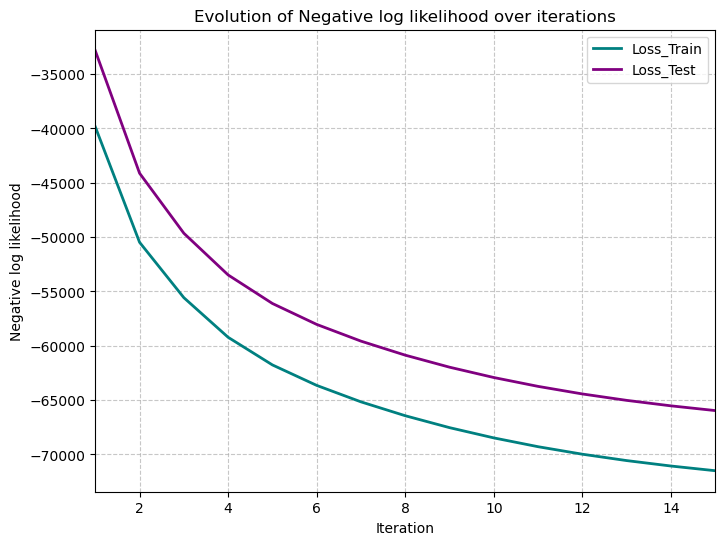

In [16]:
plot_cost_vs_iter(losses_train,losses_test)

# **4. RMSE plot**

In [17]:
def plot_rmse_vs_iter(train_rmse,test_rmse, title="Evolution of RMSE over iterations"):

  fig, ax = plt.subplots(figsize=(8, 6))
  iters = np.arange(1,len(train_rmse)+1)
  ax.plot(iters, train_rmse, color='teal',linewidth=2, label='RMSE_Train')
  ax.plot(iters, test_rmse, color='purple',linewidth=2, label='RMSE_Test')
  ax.set_xlabel("Iteration"); ax.set_xlim(1, iters[-1])
  ax.set_ylabel("RMSE")
  ax.legend()
  plt.grid(linestyle='--', alpha=0.7)
  #plt.savefig('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Rapport/Results/FINAL_RMSE.pdf', format='pdf')
  ax.set_title(title)
  plt.show()

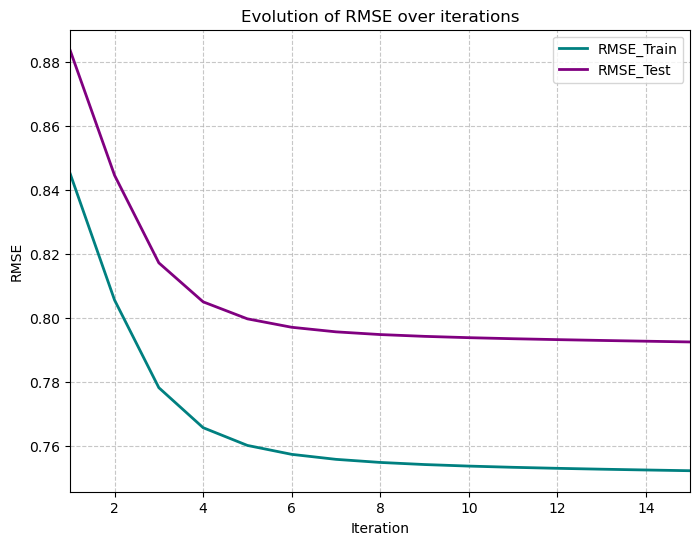

In [18]:
plot_rmse_vs_iter(rmses_train,rmses_test)

In [19]:
#Convergence
print(f" Overall, the Negative Log likelihood converges to {losses_train[-1]:.2f} on the training and {losses_test[-1]:.2f} on the test datasets." )
print(f" OveralL, the RMSE converges to {rmses_train[-1]:.2f} on the training and {rmses_test[-1]:.2f} on the test datasets." )

 Overall, the Negative Log likelihood converges to -71500.61 on the training and -65965.37 on the test datasets.
 OveralL, the RMSE converges to 0.75 on the training and 0.79 on the test datasets.


# **5. Dummy user**

# 5.1. Data hormonizing

In [20]:
# Movies data
df_movies = pd.read_csv('/home/emmanuelnk/Desktop/ML_AT_SCALE/ml-25m-20240511T131321Z-001/ml-25m/movies.csv')#,index_col='movieId'
# Movies head
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
df_movies.iloc[4993]

movieId              5099
title        Heidi (1937)
genres     Children|Drama
Name: 4993, dtype: object

In [22]:
def find_related_movies(search_string, df_movies):
    # Filter movies dataframe based on search string in titles
    related_movies = df_movies[df_movies['title'].str.contains(search_string, case=False)]
    
    # Select only movieId, title, and genres columns
    related_movies = related_movies[['movieId', 'title', 'genres']]
    
    return related_movies

In [23]:
search_string = "lord of the ring"
related_movies_df = find_related_movies(search_string, df_movies)
related_movies_df

,movieId,title,genres
2026,2116,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy
4887,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
5840,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
7028,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy


In [24]:
new_user = [(movie_to_index[4993],5)]

In [25]:
def embed_user(data_by_user, item_biases, V, lambda_, gamma, tau, K,n_epoch=20):
    # Convert data to CSR format for fast row slicing
    n_user = np.random.normal(0,1/np.sqrt(K),size=(1,K))

    user_b = 0
    for i in tqdm(range(n_epoch)):
        # Update user biases

        item_indices = np.array([n for n, _ in data_by_user])
        ratings = np.array([r for _, r in data_by_user])
        predictions = n_user.dot(V[item_indices].T) + item_biases[item_indices]
        user_b = np.sum(lambda_ * (ratings - predictions)) / (lambda_ * len(data_by_user) + gamma)

        # Update user latent factors

        item_indices = np.array([n for n, _ in data_by_user])
        ratings = np.array([r for _, r in data_by_user])
        A = V[item_indices].T.dot(V[item_indices]) + tau * np.eye(K)
        b = (ratings - user_b - item_biases[item_indices]).dot(V[item_indices])
        n_user = np.linalg.solve(lambda_ * A, lambda_ * b)
    
    return n_user

In [26]:
user_embedding = embed_user(new_user,item_biases,V,lambda_,gamma,tau,K)

100%|████████████████████████████████████████| 20/20 [00:00<00:00, 11663.80it/s]


In [33]:
score = user_embedding @ V.T + 0.05 * item_biases

In [34]:
ranks = np.argsort(score)[::-1][:20]

In [35]:
index_to_movieId = {idx:mId for mId,idx in movie_to_index.items()}

In [36]:
for rank in ranks:
    movie = index_to_movieId[rank]
    title = df_movies[df_movies['movieId'] == movie][['title','genres']].values[0]
    print(title[0],title[1])

Live! (2007) Comedy|Drama
Who You Think I Am (2019) Drama
You Are Not Alone (2016) Horror|Thriller
Cat City (1986) Animation|Children
Lewis Black: In God We Rust (2012) Comedy
Countdown (2004) Action|Adventure|Crime
Malice in Wonderland (2009) Drama|Fantasy|Romance
Naruto Shippuden the Movie: Road to Ninja (2012) Action|Adventure|Animation|Fantasy
Tormented (2009) Comedy|Horror
Don't Hug Me I'm Scared 6 (2016) Animation|Horror
Lord of the Rings: The Return of the King, The (2003) Action|Adventure|Drama|Fantasy
Cream (2017) Animation|Comedy|Horror|Sci-Fi
Lord of the Rings: The Fellowship of the Ring, The (2001) Adventure|Fantasy
The Zen Diaries of Garry Shandling: Parts 1 & 2 Comedy|Documentary
Lord of the Rings: The Two Towers, The (2002) Adventure|Fantasy
Avengers: Infinity War - Part I (2018) Action|Adventure|Sci-Fi
Yolki 2 (2011) Comedy
Avengers: Infinity War - Part II (2019) Action|Adventure|Sci-Fi
Üvegtigris (2001) Comedy
Architecture 101 (2012) Comedy|Romance


In [39]:
#Polarizing
polarity = np.linalg.norm(V, axis=0)

# Get indices of the 20 most polarized movies
most_polarizing_indices = np.argsort(polarity)[-20:][::-1]

# Print the top 20 most polarizing movies
print("The most polarizing movies are:")
for i in most_polarizing_indices:
    movie = index_to_movieId[i]
    title = df_movies[df_movies['movieId'] == movie][['title', 'genres']].values[0]
    print(f"{title[0]} ({title[1]})")

The most polarizing movies are:
Three Colors: Blue (Trois couleurs: Bleu) (1993) (Drama)
Pulp Fiction (1994) (Comedy|Crime|Drama|Thriller)
Underground (1995) (Comedy|Drama|War)
Singin' in the Rain (1952) (Comedy|Musical|Romance)
Three Colors: Red (Trois couleurs: Rouge) (1994) (Drama)


In [38]:
# Print the 20 least polarizing movies
least_polarizing_indices = np.argsort(polarity)[:20]

print("\nThe least polarizing movies are:")
for i in least_polarizing_indices:
    movie = index_to_movieId[i]
    title = df_movies[df_movies['movieId'] == movie][['title', 'genres']].values[0]
    print(f"{title[0]} ({title[1]})")


The 20 least polarizing movies are:
Three Colors: Red (Trois couleurs: Rouge) (1994) (Drama)
Singin' in the Rain (1952) (Comedy|Musical|Romance)
Underground (1995) (Comedy|Drama|War)
Pulp Fiction (1994) (Comedy|Crime|Drama|Thriller)
Three Colors: Blue (Trois couleurs: Bleu) (1993) (Drama)
